### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 1.Data Gathering

In [2]:
data = pd.read_csv(r"C:\LOAN(machine learning)\loan.csv")
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data.isnull().sum().sum()

149

<Axes: >

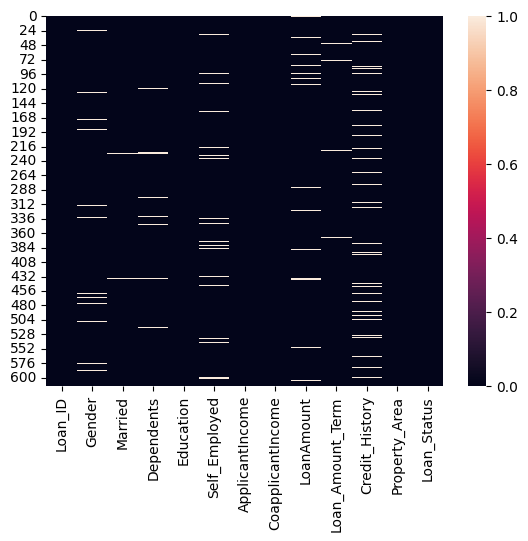

In [6]:
sns.heatmap(data.isnull())

In [7]:
# ....Drop column...
data.drop(columns=["Credit_History"], inplace=True)

##### dropping and filling null values in a dataset:

#### Handling Missing Values
(Imputing Category Data)

In [8]:
# Find data types
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


In [10]:
# fill the missing column "Gender"
data["Gender"].fillna(data["Gender"].mode()[0], inplace=True)

In [11]:
data["Gender"].isnull().sum()

0

In [12]:
# fill the missing column "Married"
data["Married"].fillna(data["Married"].mode()[0], inplace=True)

In [13]:
data["Married"].isnull().sum()

0

In [14]:
data.select_dtypes(include="float64").columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], dtype='object')

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
si = SimpleImputer(strategy="mean")
ar = si.fit_transform(data[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

In [17]:
New_data = pd.DataFrame(ar, columns=data.select_dtypes(include="float64").columns)

In [18]:
# Replace the original columns with the imputed values
data[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = New_data


In [19]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Property_Area         0
Loan_Status           0
dtype: int64

#### One Hot Encoding
###### And Dummies Variables

In [20]:
en_data = data[["Gender", "Married"]]
en_data

,Gender,Married
0,Male,No
1,Male,Yes
2,Male,Yes
3,Male,Yes
4,Male,No
...,...,...
609,Female,No
610,Male,Yes
611,Male,Yes
612,Male,Yes


In [21]:
pd.get_dummies(en_data)

,Gender_Female,Gender_Male,Married_No,Married_Yes
0,False,True,True,False
1,False,True,False,True
2,False,True,False,True
3,False,True,False,True
4,False,True,True,False
...,...,...,...,...
609,True,False,True,False
610,False,True,False,True
611,False,True,False,True
612,False,True,False,True


In [22]:
pd.get_dummies(en_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender_Female  614 non-null    bool 
 1   Gender_Male    614 non-null    bool 
 2   Married_No     614 non-null    bool 
 3   Married_Yes    614 non-null    bool 
dtypes: bool(4)
memory usage: 2.5 KB


##### Import OneHotEncoder 

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
ohe = OneHotEncoder()
arr = ohe.fit_transform(en_data).toarray()

In [25]:
data["Married"].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
encoded_df = pd.DataFrame(arr, columns=["Gender_Female", "Gender_Male", "Married_No", "Married_Yes"])
encoded_df

,Gender_Female,Gender_Male,Married_No,Married_Yes
0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0
...,...,...,...,...
609,1.0,0.0,1.0,0.0
610,0.0,1.0,0.0,1.0
611,0.0,1.0,0.0,1.0
612,0.0,1.0,0.0,1.0


#### Label Encoding

##### import Label Encoding 

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,Urban,Y


In [29]:
le = LabelEncoder()
le

LabelEncoder()

###### label encoder(Nominal Data)

In [30]:
data["Property_Area"] = le.fit_transform(data["Property_Area"])

In [31]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,2,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,2,Y


###### ordinal encoder(Ordinal Data)

In [32]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
od = OrdinalEncoder()
od

OrdinalEncoder()

#### Outlier
###### Note:-(A Point that goes beyond the given data is called an outlier)

In [34]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,1.037459
std,6109.041673,2926.248369,84.037468,64.372489,0.787482
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,2.000000
max,81000.000000,41667.000000,700.000000,480.000000,2.000000


In [35]:
data["ApplicantIncome"].isnull().sum()

0

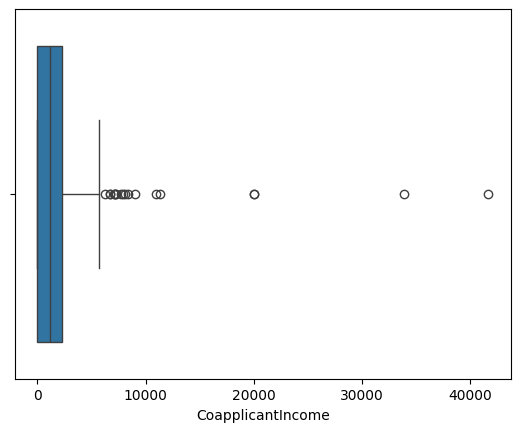

In [36]:
sns.boxplot(x="CoapplicantIncome",data=data)
plt.show()

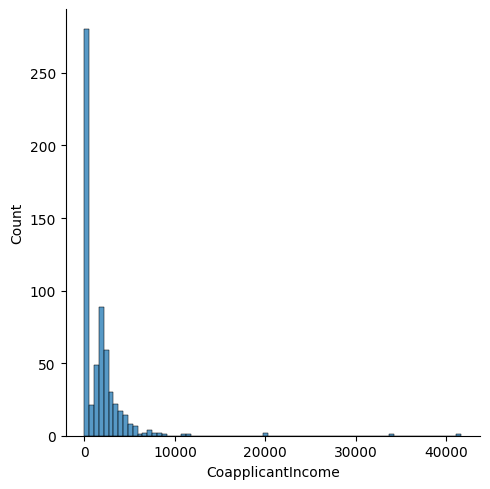

In [37]:
sns.displot(data["CoapplicantIncome"])
plt.show()

##### Outlier Removal using IQR

In [38]:
data.shape

(614, 12)

In [39]:
q1 = data["CoapplicantIncome"].quantile(0.25)
q3 = data["CoapplicantIncome"].quantile(0.75)

In [40]:
IQR = q3-q1

In [41]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)

In [42]:
min_range

-3445.875

In [43]:
max_range

5743.125

In [44]:
new_data = data[data["CoapplicantIncome"]<=max_range]

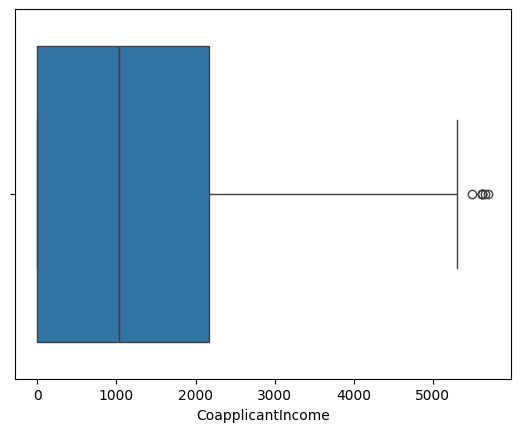

In [45]:
sns.boxplot(x="CoapplicantIncome",data=new_data)
plt.show()

In [46]:
new_data.shape

(596, 12)

#### Outlier Removal
###### (using Z score)

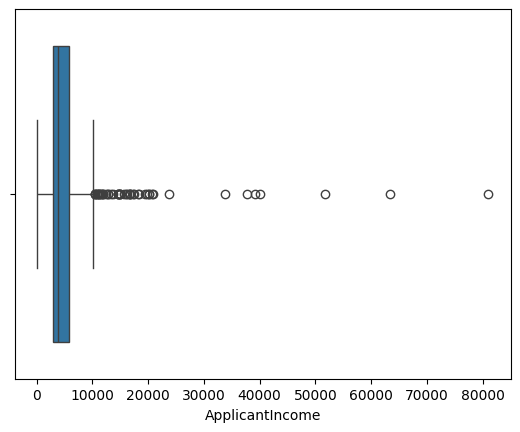

In [47]:
sns.boxplot(x="ApplicantIncome",data=data)
plt.show()

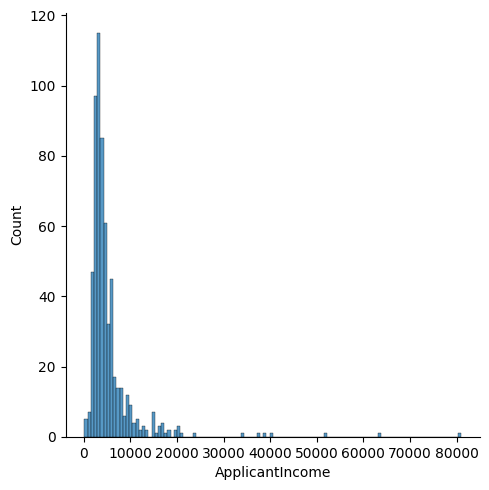

In [48]:
sns.displot(data["ApplicantIncome"])
plt.show()

In [49]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,1.037459
std,6109.041673,2926.248369,84.037468,64.372489,0.787482
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,2.000000
max,81000.000000,41667.000000,700.000000,480.000000,2.000000


In [50]:
app_min_range = data["ApplicantIncome"].mean() - (3*data["ApplicantIncome"].std())
app_max_range = data["ApplicantIncome"].mean() + (3*data["ApplicantIncome"].std())
app_min_range,app_max_range

(-12923.66573677391, 23730.584303549156)

In [51]:
app_new_data=data[data["ApplicantIncome"]<=app_max_range]

In [52]:
app_new_data.shape

(606, 12)

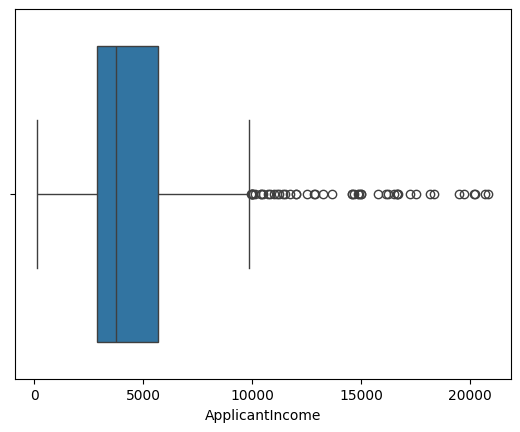

In [53]:
sns.boxplot(x="ApplicantIncome",data=app_new_data)
plt.show()

In [54]:
z_score = (data["ApplicantIncome"] - data["ApplicantIncome"].mean())/(data["ApplicantIncome"].std())

In [55]:
data["z_score"] = z_score

In [56]:
data[data["z_score"]<3].shape

(606, 13)

##### Features Scaling
###### (1.[Standardization] 2.[Normalization])

In [57]:
# import standardscaler
from sklearn.preprocessing import StandardScaler

In [58]:
ss = StandardScaler()
ss

StandardScaler()

In [59]:
data["ApplicantIncome_ss"]=pd.DataFrame(ss.fit_transform(data[["ApplicantIncome"]]),columns=["x"])

In [60]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,z_score,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,2,Y,0.072931,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,0,N,-0.134302,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,2,Y,-0.393427,-0.393747


In [61]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,z_score,ApplicantIncome_ss
count,614.000000,614.000000,614.000000,614.000000,614.000000,6.140000e+02,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.000000,1.037459,-3.761016e-17,-4.339634e-18
std,6109.041673,2926.248369,84.037468,64.372489,0.787482,1.000000e+00,1.000815e+00
min,150.000000,0.000000,9.000000,12.000000,0.000000,-8.599482e-01,-8.606493e-01
25%,2877.500000,0.000000,100.250000,360.000000,0.000000,-4.134788e-01,-4.138159e-01
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,-2.604270e-01,-2.606393e-01
75%,5795.000000,2297.250000,164.750000,360.000000,2.000000,6.409200e-02,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.000000,2.000000,1.237453e+01,1.238462e+01


##### show displot BEFORE And AFTER

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20836\2231857997.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["ApplicantIncome"])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20836\2231857997.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Applica

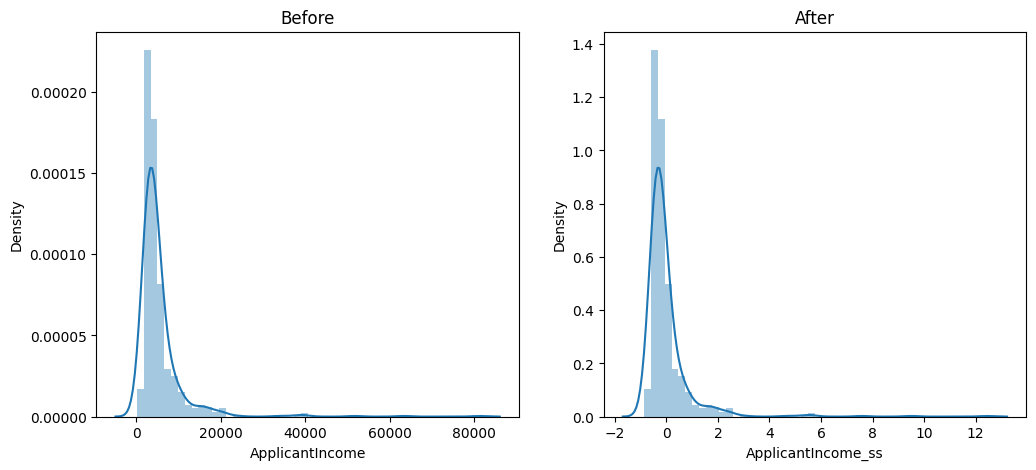

In [62]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(data["ApplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(data["ApplicantIncome_ss"])

plt.show()

##### Feature Scaling
###### ([Normalization]), MIN-MAX SCALER => NORMALIZATION TECHNIQUES

In [63]:
# import minmaxscaler
from sklearn.preprocessing import MinMaxScaler

In [64]:
mms = MinMaxScaler()
mms.fit(data[["CoapplicantIncome"]])

MinMaxScaler()

In [65]:
data["CoapplicantIncome_min"]=mms.transform(data[["CoapplicantIncome"]])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,z_score,ApplicantIncome_ss,CoapplicantIncome_min
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,2,Y,0.072931,0.072991,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,0,N,-0.134302,-0.134412,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,2,Y,-0.393427,-0.393747,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,2,Y,-0.461686,-0.462062,0.056592
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,2,Y,0.097649,0.097728,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,0,Y,-0.409796,-0.410130,0.000000
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,0,Y,-0.212383,-0.212557,0.000000
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,2,Y,0.436818,0.437174,0.005760
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,2,Y,0.356773,0.357064,0.000000


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20836\2826531197.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["CoapplicantIncome"])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20836\2826531197.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Coapp

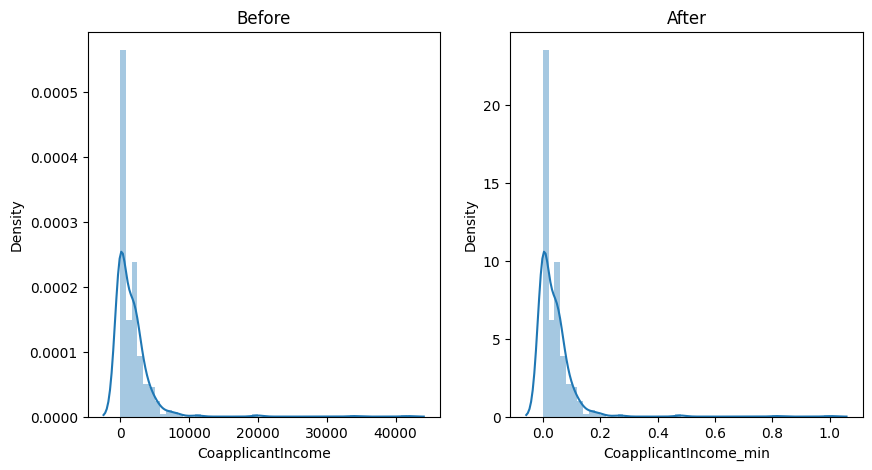

In [66]:
plt.figure(figsize=[10, 5])
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(data["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(data["CoapplicantIncome_min"])

plt.show()


#### Handling Duplicate Data

In [67]:
data.shape

(614, 15)

In [68]:
data.drop_duplicates(inplace=True)

In [69]:
data.shape #duplicate data are not present..

(614, 15)

#### Replace And Data Type Change..
1.We have to replace data when we have mixed data. 
###### 2.If we have replaced the data So, if we have to change the data type of such data, then we can change that data type in the same way..

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                614 non-null    object 
 1   Gender                 614 non-null    object 
 2   Married                614 non-null    object 
 3   Dependents             599 non-null    object 
 4   Education              614 non-null    object 
 5   Self_Employed          582 non-null    object 
 6   ApplicantIncome        614 non-null    int64  
 7   CoapplicantIncome      614 non-null    float64
 8   LoanAmount             614 non-null    float64
 9   Loan_Amount_Term       614 non-null    float64
 10  Property_Area          614 non-null    int32  
 11  Loan_Status            614 non-null    object 
 12  z_score                614 non-null    float64
 13  ApplicantIncome_ss     614 non-null    float64
 14  CoapplicantIncome_min  614 non-null    float64
dtypes: flo

In [71]:
data["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [72]:
data["Dependents"].fillna(data["Dependents"].mode()[0], inplace=True)

In [73]:
data["Dependents"].isnull().sum()

0

In [74]:
data["Dependents"].replace("3+","3", inplace=True)

In [75]:
data["Dependents"]=data["Dependents"].astype("int64") #it helps astype used in Machine Alogrithm

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                614 non-null    object 
 1   Gender                 614 non-null    object 
 2   Married                614 non-null    object 
 3   Dependents             614 non-null    int64  
 4   Education              614 non-null    object 
 5   Self_Employed          582 non-null    object 
 6   ApplicantIncome        614 non-null    int64  
 7   CoapplicantIncome      614 non-null    float64
 8   LoanAmount             614 non-null    float64
 9   Loan_Amount_Term       614 non-null    float64
 10  Property_Area          614 non-null    int32  
 11  Loan_Status            614 non-null    object 
 12  z_score                614 non-null    float64
 13  ApplicantIncome_ss     614 non-null    float64
 14  CoapplicantIncome_min  614 non-null    float64
dtypes: flo

#### Function Transformer
(If we want to convert non-normal distribution data to normal distribution, then we use function transformation.)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20836\3733718079.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["CoapplicantIncome"])


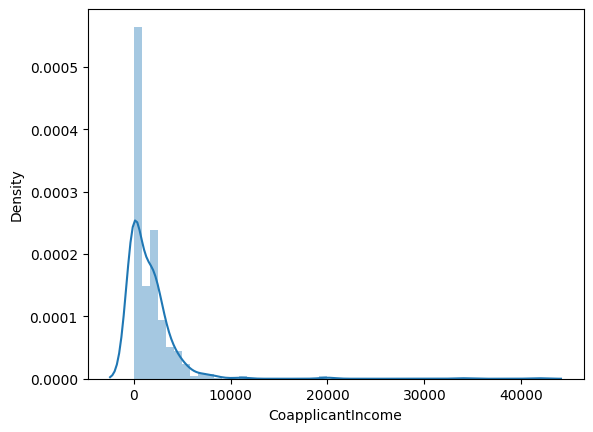

In [77]:
sns.distplot(data["CoapplicantIncome"])
plt.show()

In [78]:
q1 = data["CoapplicantIncome"].quantile(0.25)
q3 = data["CoapplicantIncome"].quantile(0.75)
IQR = q3 - q1

In [79]:
min_r = q1-(1.5*IQR)
max_r = q3+(1.5*IQR)
min_r,max_r

(-3445.875, 5743.125)

In [80]:
data = data[data["CoapplicantIncome"]<=max_r]

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20836\3733718079.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["CoapplicantIncome"])


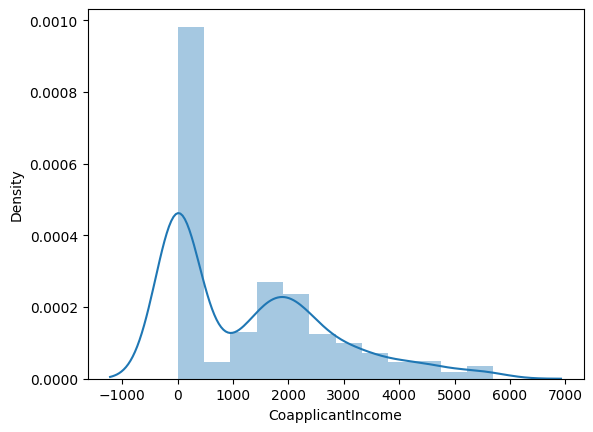

In [81]:
sns.distplot(data["CoapplicantIncome"])
plt.show()

In [82]:
# import function transformer
from sklearn.preprocessing import FunctionTransformer

In [83]:
ft = FunctionTransformer(func=np.log1p) 
ft.fit(data[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [84]:
data["CoapplicantIncome_tf"]=ft.transform(data[["CoapplicantIncome"]])

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20836\1768894055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CoapplicantIncome_tf"]=ft.transform(data[["CoapplicantIncome"]])


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20836\4175352917.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["CoapplicantIncome"])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20836\4175352917.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Coapp

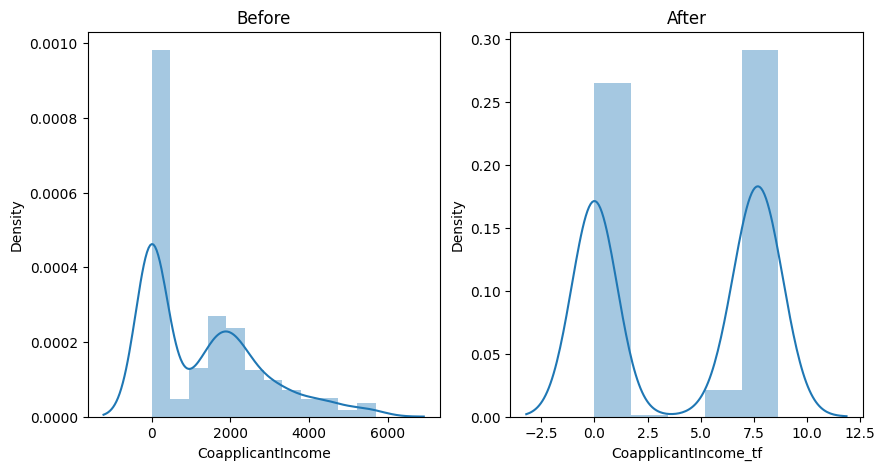

In [85]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(data["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(data["CoapplicantIncome_tf"])
plt.show()

#### Features Selection Techniques

In [86]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,z_score,ApplicantIncome_ss,CoapplicantIncome_min,CoapplicantIncome_tf
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,2,Y,0.072931,0.072991,0.000000,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,0,N,-0.134302,-0.134412,0.036192,7.319202
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,2,Y,-0.393427,-0.393747,0.000000,0.000000


In [87]:
data.shape

(596, 16)

In [88]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.


In [89]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

In [90]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,z_score,ApplicantIncome_ss,CoapplicantIncome_min,CoapplicantIncome_tf
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,2,Y,0.072931,0.072991,0.000000,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,0,N,-0.134302,-0.134412,0.036192,7.319202
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,2,Y,-0.393427,-0.393747,0.000000,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,2,Y,-0.461686,-0.462062,0.056592,7.765993
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,2,Y,0.097649,0.097728,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,0,Y,-0.409796,-0.410130,0.000000,0.000000
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,0,Y,-0.212383,-0.212557,0.000000,0.000000
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,2,Y,0.436818,0.437174,0.005760,5.484797
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,2,Y,0.356773,0.357064,0.000000,0.000000


In [91]:
drp = data.drop(columns=["Loan_ID","Gender","Married",	"Dependents",	"Education",	"Self_Employed",	"Loan_Status",	"z_score",	"ApplicantIncome_ss",	"CoapplicantIncome_min",	"CoapplicantIncome_tf"], inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20836\478923430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drp = data.drop(columns=["Loan_ID","Gender","Married",	"Dependents",	"Education",	"Self_Employed",	"Loan_Status",	"z_score",	"ApplicantIncome_ss",	"CoapplicantIncome_min",	"CoapplicantIncome_tf"], inplace=True)


In [92]:
data.shape

(596, 5)

In [93]:
lr = LogisticRegression()
lr

LogisticRegression()

#### Forward Elimination

In [94]:
x=data.iloc[::-1]
y=data["Property_Area"]

In [95]:
fs = SequentialFeatureSelector(lr,k_features=5, forward=True)
fs.fit(x,y)

C:\Users\Prashant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Prashant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Prashant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Prashant\AppData\Local\Packages\Pytho

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(5, 5),
                          scoring='accuracy')

In [96]:
fs.feature_names

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Property_Area']

In [97]:
fs.k_score_

0.3590896358543417

In [98]:
fs2 = SequentialFeatureSelector(lr,k_features=1, forward=True)
fs2.fit(x,y)


C:\Users\Prashant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Prashant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Prashant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Prashant\AppData\Local\Packages\Pytho

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(1, 1),
                          scoring='accuracy')

In [99]:
fs2.k_score_


0.379187675070028

#### Backward Elimination


In [100]:
fs3 = SequentialFeatureSelector(lr,k_features=3, forward=False)
fs3.fit(x,y)


C:\Users\Prashant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\Prashant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\Prashant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Prashant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

SequentialFeatureSelector(estimator=LogisticRegression(), forward=False,
                          k_features=(3, 3), scoring='accuracy')

In [101]:
fs3.k_score_

0.38091036414565826

#### Train Test Split in Data Test

In [102]:
data.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
0,5849,0.0,146.412162,360.0,2
1,4583,1508.0,128.000000,360.0,0
2,3000,0.0,66.000000,360.0,2


In [103]:
input_data_x = data.iloc[::-1]
output_data_y = data["Property_Area"]

In [104]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [105]:
x_train, x_test, y_train, y_test = train_test_split(input_data_x,output_data_y,test_size=0.25)

In [106]:
x_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
121,4166,0.0,44.0,360.0,1
273,2620,2223.0,150.0,360.0,1
161,7933,0.0,275.0,360.0,2
19,2600,3500.0,115.0,342.0,2
3,2583,2358.0,120.0,360.0,2
...,...,...,...,...,...
134,4895,0.0,102.0,360.0,1
488,4583,2083.0,160.0,360.0,1
580,6540,0.0,205.0,360.0,1
557,10139,0.0,260.0,360.0,1


In [107]:
x_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
69,4300,0.0,136.0,360.0,1
379,5391,0.0,130.0,360.0,2
21,5955,5625.0,315.0,360.0,2
132,2718,0.0,70.0,360.0,1
327,5818,2160.0,184.0,360.0,1
...,...,...,...,...,...
461,7740,0.0,128.0,180.0,2
304,4000,2500.0,140.0,360.0,0
7,3036,2504.0,158.0,360.0,1
422,1820,1719.0,100.0,360.0,2


In [108]:
y_train

490    1
338    2
452    0
595    0
610    0
      ..
478    1
124    0
33     1
57     0
156    0
Name: Property_Area, Length: 447, dtype: int32

In [109]:
y_test

545    0
233    1
593    0
480    0
284    0
      ..
152    2
307    2
606    1
192    2
288    1
Name: Property_Area, Length: 149, dtype: int32

In [110]:
x_train.shape,y_train.shape

((447, 5), (447,))

In [111]:
y_test.shape,y_test.shape

((149,), (149,))

In [112]:
data.shape

(596, 5)

#### Regression Analysis

In [113]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
0,5849,0.0,146.412162,360.0,2
1,4583,1508.0,128.000000,360.0,0
2,3000,0.0,66.000000,360.0,2
3,2583,2358.0,120.000000,360.0,2
4,6000,0.0,141.000000,360.0,2
...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,0
610,4106,0.0,40.000000,180.0,0
611,8072,240.0,253.000000,360.0,2
612,7583,0.0,187.000000,360.0,2


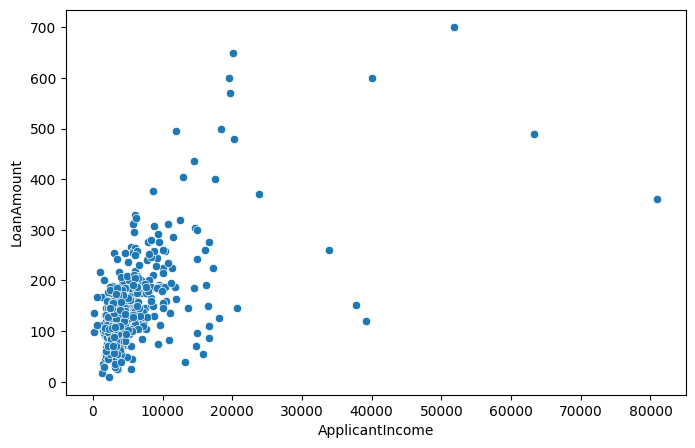

In [114]:
plt.figure(figsize=[8,5])
sns.scatterplot(x="ApplicantIncome", y="LoanAmount",data=data)
plt.show()

In [115]:
x1=data[["ApplicantIncome"]]
y1=data["LoanAmount"]

In [116]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.25, random_state=42)

In [117]:
x1_train.shape,y1_train.shape

((447, 1), (447,))

In [118]:
# import LinearRegression
from sklearn.linear_model import LinearRegression

In [119]:
lr1=LinearRegression()
lr1.fit(x1_train,y1_train)

LinearRegression()

In [120]:
lr1.coef_

array([0.00781221])

In [121]:
lr1.score(x1_test,y1_test)*100

22.322975487968776

In [122]:
lr1.predict([[5849]])

C:\Users\Prashant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([148.53524599])

In [123]:
y1_prd = lr1.predict(x1)

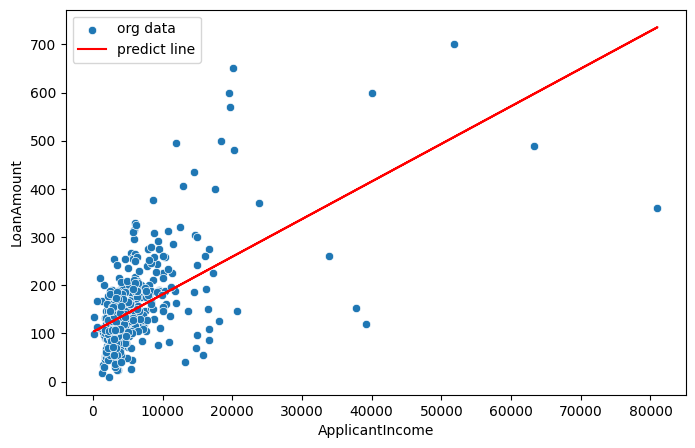

In [124]:
plt.figure(figsize=[8,5])
sns.scatterplot(x="ApplicantIncome", y="LoanAmount",data=data)
plt.plot(data["ApplicantIncome"],y1_prd, c="red")
plt.legend(["org data", "predict line"])
plt.savefig("predict.jpg")
plt.show()


#### Multiple Linear Regression

In [125]:
data.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
0,5849,0.0,146.412162,360.0,2
1,4583,1508.0,128.000000,360.0,0
2,3000,0.0,66.000000,360.0,2


In [126]:
lr1.coef_

array([0.00781221])

In [127]:
# Features (X) and Target variable (y)
x2 = data[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Property_Area']]
y2 = data['LoanAmount']


In [128]:
# Split the data into training and testing sets (80% train, 20% test)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)


In [129]:
# Initialize the linear regression model
lr2 = LinearRegression()

# Fit the model on the training data
lr2.fit(x2_train, y2_train)


LinearRegression()

In [130]:
# Make predictions on the test set
y2_pred = lr2.predict(x2_test)

In [131]:
lr2.coef_

array([ 0.00843024,  0.0118419 ,  0.12386988, -0.34509106])

In [132]:
lr2.intercept_

42.848070828380074

In [133]:
lr2.predict(x2_test)

array([144.02827126, 166.76838716, 238.75870154, 254.24729024,
       143.78196975, 258.01036423, 127.849649  , 146.66629472,
       140.06464247, 103.29008725, 194.75629013, 155.83790043,
       112.04177895, 124.95229124, 106.79816689, 126.99593474,
       167.59599216, 144.95235548, 131.80496612, 126.65872496,
       122.21653508, 126.08656626, 118.12288593, 119.51885685,
       149.26021041, 127.13979786, 154.61319235, 138.36710745,
       138.40205552, 184.36945719, 151.47052072, 107.2865721 ,
       142.09641282, 113.44962978, 137.33632252, 138.40832508,
       133.22884791, 111.88893663,  99.75923307, 227.24950004,
       132.99011474, 150.21725211, 110.02117941, 131.19316285,
       153.33521654, 123.03613337, 143.35903928,  95.52620186,
       147.06276924, 140.6356538 , 133.43993878, 123.73258888,
       114.83952219, 172.83885271, 172.67159632, 122.21653508,
       181.51168981, 140.84369095, 129.61574772, 121.76824323,
       159.86135743, 127.48785142, 109.09686307, 162.78

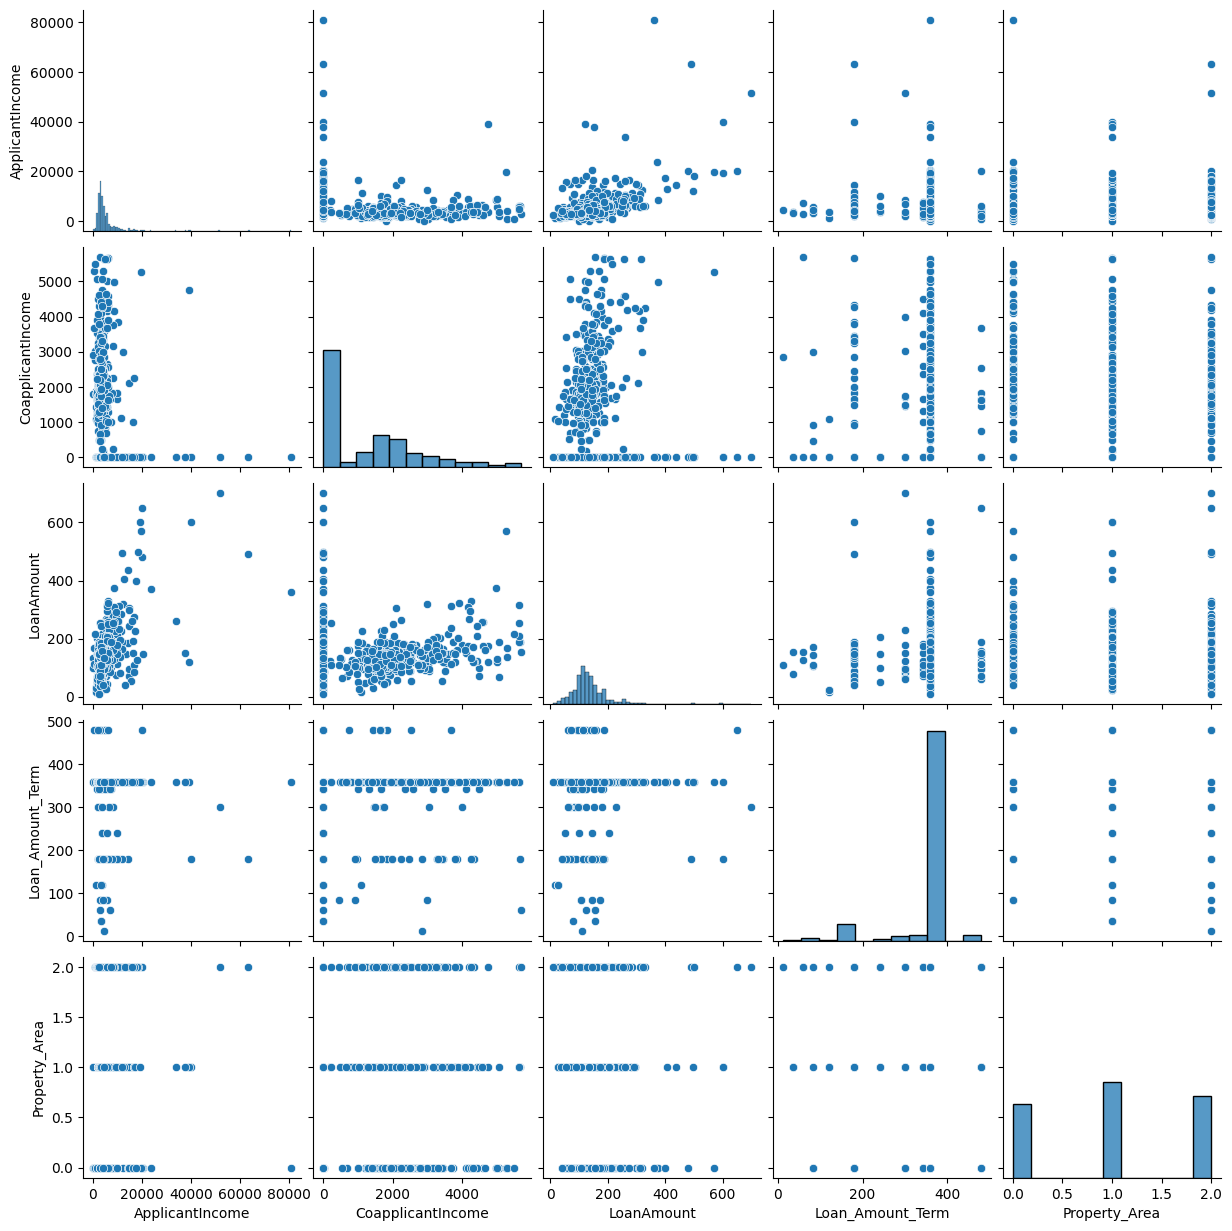

In [134]:
sns.pairplot(data=data)
plt.show()

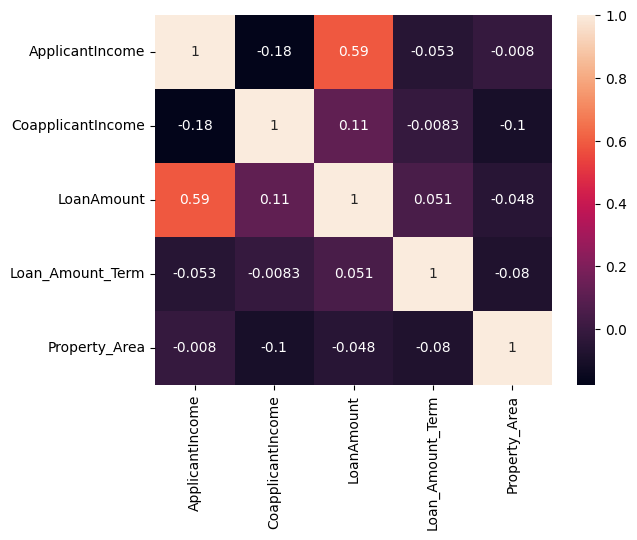

In [135]:
sns.heatmap(data=data.corr(), annot=True)
plt.show()